Interacting Proteins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
gbm = cptac.Gbm()
endo = cptac.Endometrial()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [3]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [4]:
cancer1 = "GBM"
cancer2 = "Endometrial"
gene = 'PTEN'

In [5]:
#GBM ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
gbm_prot = list(mut_status.columns[:-1]) # new prot list without na in all tumor (sometimes values in normal)
mut_status

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)


Name,MDM2_proteomics,CSNK2A1_proteomics,PDGFRB_proteomics,PIK3R2_proteomics,PIK3C3_proteomics,CSNK2A2_proteomics,SLC9A3R1_proteomics,USP13_proteomics,PIK3CA_proteomics,TP53_proteomics,...,PIK3CD_proteomics,ROCK1_proteomics,SHC1_proteomics,NEDD4_proteomics,INPP4B_proteomics,PIK3R1_proteomics,AKT1_proteomics,MVP_proteomics,MAGI3_proteomics,binary_mutations
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,-0.886531,0.221578,-0.108555,-0.068085,0.081642,-0.273672,0.616424,-0.423661,0.124542,0.044573,...,-0.315003,-0.319701,-0.095985,-0.437514,0.060124,-0.379646,-0.065930,0.147936,0.311427,Mutated
C3L-00365,NaN,0.169391,-0.109383,0.079710,-0.027524,-0.035616,0.450206,0.155746,-0.211025,0.117856,...,-0.629943,0.013908,0.003049,0.179955,-0.639545,-0.283144,-0.285929,0.371665,0.259059,Wildtype
C3L-00674,NaN,-0.208625,0.414121,0.078025,0.062739,-0.105403,0.307356,-0.021276,-0.573919,-0.120887,...,0.085276,-0.048311,0.051279,0.265735,0.669283,0.061201,-0.222607,0.329753,0.128442,Mutated
C3L-00677,-0.564682,-0.292558,-0.141799,0.024117,0.087752,-0.189861,-0.040643,-0.322976,-0.360962,1.832557,...,-0.382652,-0.046639,0.288725,0.706601,0.451016,-0.496340,-0.370584,-0.518407,-0.099551,Mutated
C3L-01040,-0.243835,0.132716,0.812053,-0.029297,-0.057555,0.239919,-0.155468,-0.049040,0.137414,-0.288708,...,-0.537787,0.237764,-0.337079,0.133808,-0.024038,-0.146416,0.004573,-0.741119,-0.017146,Wildtype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-03183,NaN,-0.015279,0.121787,-0.116620,-0.092783,-0.022308,0.128944,-0.096330,-0.218186,-0.343235,...,0.395350,0.141372,0.557741,0.418850,0.010608,-0.093624,-0.002002,-0.090315,-0.079546,Mutated
C3N-03184,NaN,0.312023,0.361701,-0.023912,-0.160911,0.266436,-1.291855,0.276721,-0.049803,NaN,...,-0.556546,-0.158482,-0.282123,0.028673,-0.219639,-0.164426,0.501695,-0.994267,-0.364258,Wildtype
C3N-03186,0.137052,-0.069012,0.606401,0.626821,-0.029083,-0.161898,0.075817,0.091852,0.815177,NaN,...,-0.009546,-0.222781,0.061741,0.013211,0.348604,0.443719,0.196700,0.086260,0.541898,Wildtype


In [6]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

gbm_d = {}

for prot in gbm_prot:
    dif_gbm = mut_med[prot] - wt_med[prot]
    gbm_d[prot] = dif_gbm

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])
gbm_df

,Gbm
MDM2_proteomics,0.187632
CSNK2A1_proteomics,-0.030599
PDGFRB_proteomics,0.076573
PIK3R2_proteomics,-0.064189
PIK3C3_proteomics,-0.025622
CSNK2A2_proteomics,-0.081351
SLC9A3R1_proteomics,0.071166
USP13_proteomics,-0.037459
PIK3CA_proteomics,-0.181610
TP53_proteomics,-0.197015


Endo

In [7]:
#Endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
en_prot = list(mut_status.columns[:-1])

mut_status

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)


Name,CSNK2A1_proteomics,PDGFRB_proteomics,PIK3R2_proteomics,PIK3C3_proteomics,CSNK2A2_proteomics,SLC9A3R1_proteomics,USP13_proteomics,PIK3CA_proteomics,TP53_proteomics,EGFR_proteomics,...,PIK3CD_proteomics,ROCK1_proteomics,SHC1_proteomics,NEDD4_proteomics,INPP4B_proteomics,PIK3R1_proteomics,AKT1_proteomics,MVP_proteomics,MAGI3_proteomics,binary_mutations
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,0.01510,-0.4940,0.0540,-0.41600,0.2670,0.404,-0.0543,-0.4500,0.2950,0.383,...,-0.25200,-0.3670,-0.1250,-0.8590,-0.540,0.481,-0.2550,-0.167,-0.3070,Mutated
C3L-00008,0.04990,-0.5450,0.0165,0.01280,0.0528,1.380,0.0627,-0.2150,0.2770,-0.424,...,-1.03000,-0.2730,-0.6750,-1.3100,-0.988,-0.855,0.0453,-0.924,0.3780,Mutated
C3L-00032,-0.28000,0.0143,0.0502,-0.00815,-0.2410,0.659,-0.2780,-0.1780,-0.8710,0.410,...,0.45700,0.1800,-0.0194,-0.7620,1.320,0.266,-0.0722,0.273,0.4150,Mutated
C3L-00090,0.06880,-0.1460,0.1380,-0.02940,-0.0641,0.735,-0.6070,-0.3920,-0.3430,0.865,...,-0.45600,-0.0574,-0.3780,-1.3000,-0.807,-0.135,0.0968,0.152,-0.1250,Mutated
C3L-00098,0.35000,-1.3400,0.0690,0.04510,-0.0431,-1.150,-0.0664,0.2870,3.0100,-1.760,...,0.00543,-0.1640,0.1030,-0.0684,0.201,-0.612,-0.6410,1.200,-0.2160,Wildtype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01520,-0.21200,-0.7660,0.1080,0.36700,-0.2410,1.150,0.5140,-0.4860,-0.2570,-0.173,...,-0.12900,-0.1760,-0.4970,-0.9740,0.152,0.218,0.0217,-0.707,-0.0286,Mutated
C3N-01521,-0.00398,-1.1200,-0.0944,-0.28300,0.1530,0.027,1.0900,0.0820,1.2000,-1.560,...,0.20500,-0.3270,0.8070,-0.4740,0.820,0.117,0.1720,0.396,0.4750,Wildtype
C3N-01537,-0.07130,-0.7420,-0.1340,0.18900,0.1240,0.758,-0.2650,-0.0312,-0.0333,-0.597,...,0.74600,-0.1740,-0.1530,-0.8110,-0.224,-0.333,-0.2300,0.310,0.2760,Wildtype


In [8]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

en_d = {}

for prot in en_prot:
    dif_en = mut_med[prot] - wt_med[prot]
    en_d[prot] = dif_en

In [9]:
en_df = pd.DataFrame.from_dict(en_d, orient='index', columns=['Endo'])
en_df

,Endo
CSNK2A1_proteomics,-0.093110
PDGFRB_proteomics,0.069500
PIK3R2_proteomics,0.040800
PIK3C3_proteomics,-0.044095
CSNK2A2_proteomics,-0.127198
SLC9A3R1_proteomics,0.404600
USP13_proteomics,-0.005550
PIK3CA_proteomics,-0.396000
TP53_proteomics,-0.779800
EGFR_proteomics,0.461500


Ovarian

In [10]:
ov = cptac.Ovarian()

In [11]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = ov.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip) 
prot_and_mutations = ov.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
ov_prot = list(mut_status.columns[:-1])

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: Due to dropping the specified levels, dataframe now has 2 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)


In [12]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

ov_dict = {}

for prot in ov_prot:
    delta_ov = mut_med[prot] - wt_med[prot]
    ov_dict[prot] = delta_ov

ov_df = pd.DataFrame.from_dict(ov_dict, orient='index', columns=['Ovarian'])
ov_df

#ov_df = ov_df.replace(to_replace = "NP_", value = '',regex= True)
#ov_df

,Ovarian
AKT1_proteomics,-0.334056
CSNK2A1_proteomics,-0.187129
CSNK2A2_proteomics,0.0283537
EGFR_proteomics,0.106881
INPP4B_proteomics,0.282097
MAGI3_proteomics,-0.309116
MAST2_proteomics,0.169835
MVP_proteomics,0.0991483
NEDD4_proteomics,NEDD4_proteomics 0.171027 NEDD4_proteomics ...
PDGFRB_proteomics,-0.134127


Breast

In [13]:
b = cptac.Brca()

No Somatic Mut in brca

In [15]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = b.get_proteomics()
prot = b.reduce_multiindex(prot, levels_to_drop = 1)
prot_list = list(prot.columns)
prot_and_mutations = b.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list) 
prot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
b_prot = list(mut_status.columns[:-1])

cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)
cptac warning: Due to dropping the specified levels, dataframe now has 655 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 7)


In [17]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

b_dict = {}

for prot in b_prot:
    delta_b = mut_med[prot] - wt_med[prot]
    b_dict[prot] = delta_b

b_df = pd.DataFrame.from_dict(b_dict, orient='index', columns=['Breast'])
b_df

,Breast
A1BG_proteomics,0.5277
A2M_proteomics,0.1767
A2ML1_proteomics,-0.1471
AAAS_proteomics,-0.1138
AACS_proteomics,0.0759
...,...
ZXDC_proteomics,0.5291
ZYG11B_proteomics,0.0289
ZYX_proteomics,0.3078
ZZEF1_proteomics,0.1766


Colon

In [18]:
col = cptac.Colon()

In [19]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = col.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip) 
#prot_and_mutations = col.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
col_prot = list(mut_status.columns[:-1])

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MAGI3, MAST2, MDM2, PIK3R3, PREX2 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


In [20]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

col_dict = {}

for prot in col_prot:
    delta_col = mut_med[prot] - wt_med[prot]
    col_dict[prot] = delta_col

col_df = pd.DataFrame.from_dict(col_dict, orient='index', columns=['Colon'])
col_df

,Colon
CSNK2A1_proteomics,-0.09475
PDGFRB_proteomics,-0.07800
PIK3R2_proteomics,0.05960
PIK3C3_proteomics,0.19635
CSNK2A2_proteomics,0.00835
SLC9A3R1_proteomics,-0.09150
USP13_proteomics,0.03150
PIK3CA_proteomics,-0.15480
TP53_proteomics,-0.50300
EGFR_proteomics,-0.08550


Kidney

In [21]:
r = cptac.Ccrcc()

189 / 194 samples missing mutation status. 
Only 5 mutations recorded. Look at cnv.

In [22]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = r.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip) 
prot_and_mutations = r.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
k_prot = list(mut_status.columns[:-1])
prot_and_mutations['PTEN_Mutation_Status'].value_counts()

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 189 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


Wildtype_Tumor       105
Wildtype_Normal       84
Single_mutation        4
Multiple_mutation      1
Name: PTEN_Mutation_Status, dtype: int64

In [23]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

k_dict = {}

for prot in k_prot:
    delta_k = mut_med[prot] - wt_med[prot]
    k_dict[prot] = delta_k

k_df = pd.DataFrame.from_dict(k_dict, orient='index', columns=['Kidney'])
k_df

,Kidney
AKT1_proteomics,-0.016091
CSNK2A1_proteomics,-0.028320
CSNK2A2_proteomics,-0.045960
EGFR_proteomics,0.146783
INPP4B_proteomics,-0.050288
MAGI3_proteomics,0.211432
MAST2_proteomics,0.089637
MDM2_proteomics,NaN
MVP_proteomics,-0.123192
NEDD4_proteomics,-0.321282


Lung - PTEN not in mutations data

In [24]:
l = cptac.Luad()

cptac warning: This data is under a publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [28]:
'''# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = l.get_proteomics()
prot = l.reduce_multiindex(prot, levels_to_drop = 1)
prot_list = list(prot.columns)
prot_and_mutations = l.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list) 
prot_and_mutations = l.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
k_prot = list(mut_status.columns[:-1])'''

'# Step 1 - Create dataframe in order to do comparisons with wrap_ttest\nprot = l.get_proteomics()\nprot = l.reduce_multiindex(prot, levels_to_drop = 1)\nprot_list = list(prot.columns)\nprot_and_mutations = l.join_omics_to_mutations(\n    mutations_genes = [gene], omics_df_name = \'proteomics\', omics_genes = prot_list) \nprot_and_mutations = l.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)\n\n# Step 2 - Create binary column \nprot_and_mutations[\'binary_mutations\'] = np.where(\n            prot_and_mutations[gene+\'_Mutation_Status\'] == \'Wildtype_Tumor\', \'Wildtype\', \'Mutated\')\n\n# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)\ntumors = prot_and_mutations[prot_and_mutations.Sample_Status == \'Tumor\'] #drop Normal samples\ncolumns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]\nmut_status = tumors.drop(columns_to_drop, axis = 1)\nmut_status = mut_status.dropna(axis=1,how=\'a

In [29]:
'''mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

l_dict = {}

for prot in gbm_prot:
    l_delta = mut_med[prot] - wt_med[prot]
    l_dict[prot] = l_delta

l_df = pd.DataFrame.from_dict(l_dict, orient='index', columns=['Gbm'])
l_df'''

"mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']\nwt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']\n\nmut_med = mut_df.median()\nwt_med = wt_df.median()\n\nl_dict = {}\n\nfor prot in gbm_prot:\n    l_delta = mut_med[prot] - wt_med[prot]\n    l_dict[prot] = l_delta\n\nl_df = pd.DataFrame.from_dict(l_dict, orient='index', columns=['Gbm'])\nl_df"

Head and Neck

In [27]:
h = cptac.Hnscc()

In [31]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot_and_mutations = h.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip) 
#prot_and_mutations = r.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
h_prot = list(mut_status.columns[:-1])

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 176 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)


In [32]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

h_dict = {}

for prot in h_prot:
    dif_h = mut_med[prot] - wt_med[prot]
    h_dict[prot] = dif_h

h_df = pd.DataFrame.from_dict(h_dict, orient='index', columns=['Hnscc'])
h_df

,Hnscc
CSNK2A1_proteomics,0.004467
PDGFRB_proteomics,-0.508124
PIK3R2_proteomics,0.121448
PIK3C3_proteomics,0.149065
CSNK2A2_proteomics,0.142179
SLC9A3R1_proteomics,0.365602
USP13_proteomics,-0.275070
PIK3CA_proteomics,0.013791
TP53_proteomics,-0.777996
EGFR_proteomics,0.264375


Combine

In [33]:
# Breast and Lung no mutations dataframe
# HN - PTEN not found in mutation data

n = gbm_df.join(en_df)
m = n.join(ov_df)
o = m.join(col_df)
l = o.join(k_df)
l = l.join(h_df)
#l = l.join(l_df)

p = l.transpose()
ip_df = p.dropna(axis = 1,thresh=4)
ip_df = ip_df.drop('NEDD4_proteomics', axis = 1) # fix -2 values for ov
#ip_df = ip_df.reset_index()
#ip_df = ip_df.rename(columns = {'index':'Cancer'})
ip_df.index.name = 'Cancer'
ip_df

,CSNK2A1_proteomics,PDGFRB_proteomics,PIK3R2_proteomics,PIK3C3_proteomics,CSNK2A2_proteomics,SLC9A3R1_proteomics,USP13_proteomics,PIK3CA_proteomics,TP53_proteomics,EGFR_proteomics,...,PREX2_proteomics,MAST2_proteomics,PIK3CD_proteomics,ROCK1_proteomics,SHC1_proteomics,INPP4B_proteomics,PIK3R1_proteomics,AKT1_proteomics,MVP_proteomics,MAGI3_proteomics
Cancer,,,,,,,,,,,,,,,,,,,,,
Gbm,-0.0305989,0.0765728,-0.0641894,-0.025622,-0.0813515,0.0711665,-0.037459,-0.18161,-0.197015,0.435094,...,-0.0754449,0.0215432,-0.102957,0.057412,0.190225,-0.00336814,-0.0526728,0.0443257,-0.0275698,0.0105644
Endo,-0.09311,0.0695,0.0408,-0.044095,-0.127198,0.4046,-0.00555,-0.396,-0.7798,0.4615,...,0.498,0.0415,-0.13185,0.01635,-0.22655,0.2062,0.295,-0.0305,-0.0665,-0.00421
Ovarian,-0.187129,-0.134127,0.316172,-0.0229978,0.0283537,0.00500734,-0.110064,0.0712056,-0.095678,0.106881,...,0.269105,0.169835,0.55994,0.0561998,0.0853117,0.282097,0.147344,-0.334056,0.0991483,-0.309116
Colon,-0.09475,-0.078,0.0596,0.19635,0.00835,-0.0915,0.0315,-0.1548,-0.503,-0.0855,...,NaN,NaN,0.0626,0.11925,0.1981,-0.4695,0.18755,-0.0897,-0.0888,NaN
Kidney,-0.0283196,-0.256534,0.128528,-0.0115752,-0.0459595,-0.183116,-0.142806,-0.0651189,-0.159571,0.146783,...,-0.330395,0.0896375,-0.0980044,-0.024704,NaN,-0.0502878,0.21282,-0.0160906,-0.123192,0.211432
Hnscc,0.00446699,-0.508124,0.121448,0.149065,0.142179,0.365602,-0.27507,0.0137907,-0.777996,0.264375,...,0.995386,NaN,-0.203206,0.0906092,0.247364,-0.471918,-0.131009,-0.1267,0.458188,0.230587


In [34]:
ip_df.to_csv('mut_vs_wt_interacting_directionality.csv')

In [ ]:
h = pd.read_csv('interacting_directionality.csv')

In [ ]:
h

In [41]:
len(ip_df.columns)

25

In [ ]:
r.get_somatic_mutation()

In [35]:
stdev = ip_df.std()

In [36]:
stdev = stdev.to_frame()

In [37]:
stdev.loc[stdev[0] > .2]

,0
PDGFRB_proteomics,0.220796
SLC9A3R1_proteomics,0.240780
TP53_proteomics,0.312163
EGFR_proteomics,0.208820
PREX2_proteomics,0.514288
PIK3CD_proteomics,0.281100
INPP4B_proteomics,0.324028
MVP_proteomics,0.217939
MAGI3_proteomics,0.217760


In [38]:
d_stdev = stdev.std()
d_stdev

0    0.102161
dtype: float64

In [42]:
stdev

,0
CSNK2A1_proteomics,0.068827
PDGFRB_proteomics,0.220796
PIK3R2_proteomics,0.126569
PIK3C3_proteomics,0.104257
CSNK2A2_proteomics,0.094916
SLC9A3R1_proteomics,0.240780
USP13_proteomics,0.111442
PIK3CA_proteomics,0.166520
TP53_proteomics,0.312163
EGFR_proteomics,0.208820


Text(0, 0.5, 'Count')

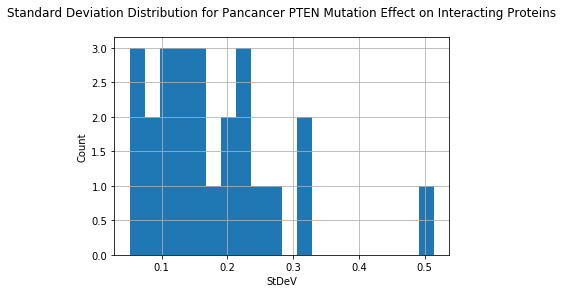

In [39]:
a = stdev.hist(bins = 20)
plt.title("Standard Deviation Distribution for Pancancer PTEN Mutation Effect on Interacting Proteins\n")
plt.xlabel('StDeV')
plt.ylabel('Count')

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
sns.set(font_scale = 1.3)
a = sns.distplot(stdev, bins = 20)

a.set_title("Standard Deviation Distribution for Pancancer PTEN Mutation Effect on Proteomics\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
a.set(xlabel = 'StDeV', ylabel = 'Frequency')

Mean

In [ ]:
mean_df = stdev.mean()

In [ ]:
a = mean_df.hist(bins = 20)
plt.title("Distribution of the Mean between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Mean')
plt.ylabel('Count')

In [ ]:
m_df = stdev.median()

In [ ]:
a = m_df.hist(bins = 20)
plt.title("Distribution of the Medians between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Median')
plt.ylabel('Count')